In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [ ]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.drop(columns="Cabin",inplace=True)
test.drop(columns="Cabin",inplace=True)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [ ]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train["Embarked"].fillna("S",inplace=True)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [ ]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [ ]:
train_age=np.random.randint(train["Age"].mean()-train["Age"].std(),train["Age"].mean()+train["Age"].std(),177)
test_age=np.random.randint(test["Age"].mean()-test["Age"].std(),test["Age"].mean()+test["Age"].std(),86)

In [ ]:
train_age

array([24, 43, 35, 19, 32, 22, 38, 33, 21, 26, 31, 28, 42, 34, 38, 16, 17,
       16, 43, 22, 42, 42, 42, 35, 28, 23, 24, 23, 32, 26, 16, 17, 37, 39,
       26, 17, 33, 29, 33, 38, 26, 22, 32, 27, 43, 36, 23, 42, 18, 31, 23,
       32, 28, 30, 33, 19, 23, 31, 37, 33, 26, 32, 20, 32, 17, 32, 15, 28,
       26, 17, 40, 38, 29, 19, 36, 41, 33, 27, 39, 25, 24, 16, 32, 42, 20,
       30, 24, 29, 42, 31, 33, 43, 35, 33, 35, 26, 27, 41, 23, 25, 21, 24,
       35, 16, 29, 24, 32, 23, 24, 21, 36, 40, 37, 34, 28, 41, 41, 25, 29,
       42, 39, 30, 31, 35, 20, 21, 21, 15, 36, 27, 29, 41, 27, 35, 40, 30,
       34, 30, 33, 16, 37, 40, 35, 26, 37, 36, 26, 30, 35, 30, 20, 42, 17,
       36, 33, 30, 21, 29, 43, 29, 42, 26, 15, 38, 36, 30, 35, 33, 41, 18,
       28, 33, 17, 27, 27, 31, 36])

In [ ]:
test_age

array([31, 32, 35, 23, 19, 35, 22, 20, 27, 40, 40, 27, 39, 33, 19, 39, 25,
       33, 34, 30, 17, 17, 43, 16, 17, 21, 36, 25, 16, 37, 16, 29, 16, 25,
       34, 18, 28, 35, 30, 33, 29, 36, 20, 33, 30, 28, 32, 29, 43, 36, 18,
       34, 39, 18, 33, 26, 43, 20, 28, 31, 40, 42, 29, 26, 18, 26, 18, 28,
       21, 29, 17, 42, 24, 40, 35, 20, 21, 18, 32, 22, 21, 23, 40, 22, 24,
       30])

In [ ]:
train["Age"][train["Age"].isnull()]=train_age
test["Age"][test["Age"].isnull()]=test_age

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [ ]:
train["Age"]=train["Age"].astype(int)
test["Age"]=test["Age"].astype(int)

In [ ]:
train["Pclass"][train["Survived"]==1].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [ ]:
train.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
train.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
train.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


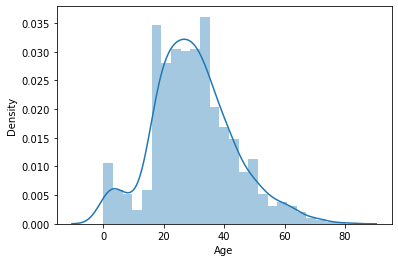

In [ ]:
sns.distplot(train["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


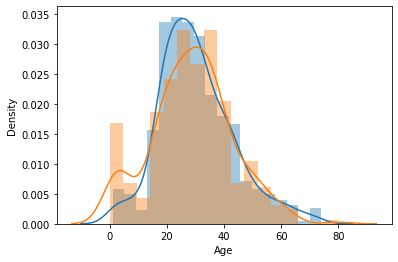

In [ ]:
sns.distplot(train["Age"][train["Survived"]==0])
sns.distplot(train["Age"][train["Survived"]==1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


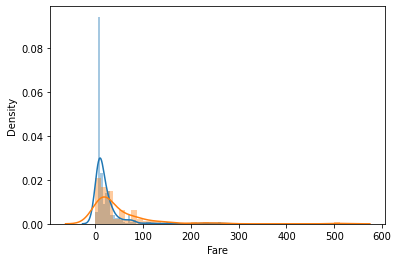

In [ ]:
sns.distplot(train["Fare"][train["Survived"]==0])
sns.distplot(train["Fare"][train["Survived"]==1])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,36,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [ ]:
train.drop(columns="Ticket",inplace=True)
test.drop(columns="Ticket",inplace=True)

In [ ]:
train["Family"]=train["SibSp"] + train["Parch"]+1
test["Family"]=test["SibSp"] + test["Parch"]+1

In [ ]:
train.drop(columns=["SibSp","Parch"],inplace=True)
test.drop(columns=["SibSp","Parch"],inplace=True)


In [ ]:
train["Family"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [ ]:
train.groupby(["Family"])["Survived"].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [ ]:
def family(x):
  if x==1:
    return "Alone"
  elif x==2 or x==3 or x==4:
    return "Medium"
  else:
    return "Large"

In [ ]:
train["Family_size"]=train["Family"].apply(family)
test["Family_size"]=test["Family"].apply(family)


In [ ]:
train.drop(columns="Family",inplace=True)
test.drop(columns="Family",inplace=True)

In [ ]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [ ]:
passengerId=test["PassengerId"].values

In [ ]:
train.drop(columns=["Name","PassengerId"],inplace=True)
test.drop(columns=["Name","PassengerId"],inplace=True)


In [ ]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [ ]:
x=train.iloc[:,1:]
y=train.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=33)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [ ]:
step1=ColumnTransformer([
                   ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,4]),
                   ("col_tnf_or",OrdinalEncoder(categories=[["Alone","Medium","Large"]]),["Family_size"])
],remainder="passthrough")

step2=GradientBoostingClassifier(n_estimators=100)

pipe=Pipeline([
               ("step1",step1),
               ("step2",step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.8432835820895522


In [ ]:
xf=test.iloc[:,:]

In [ ]:
y_final=pipe.predict(xf)

In [ ]:
final=pd.DataFrame()

In [ ]:
final["PassengerId"]=passengerId
final["Survived"]=y_final

In [ ]:
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
final.to_csv("Submission.csv",index=False)